# P10 - K-Nearest-Neighbors (KNN), Decision Trees, Random Forests and Gradient Boosted Trees

## KNN Classification using the Iris Dataset

In [2]:
# %pip install numpy pandas matplotlib scikit-learn

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# We will use an example dataset that comes with scikit learn
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [40]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [42]:
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Let's only use petal length and petal width for simplicity.

In [45]:
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target

In [46]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [48]:
y.unique()

array([0, 1, 2])

In [49]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1337)

In [51]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundaries(classifier, cmap=plt.cm.rainbow_r):
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X_train, response_method="predict",
        xlabel=X_train.columns[0], ylabel=X_train.columns[1],
        alpha=0.5, cmap=cmap
    )
    disp.ax_.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, edgecolor="k", cmap=cmap)
    plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30, weights='uniform', p=2)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [53]:
y_val_preds = knn.predict(X_val)
print(y_val_preds)

[0 0 1 2 1 2 1 2 1 1 0 1 1 2 0 0 2 0 0 0 2 2 0 1]


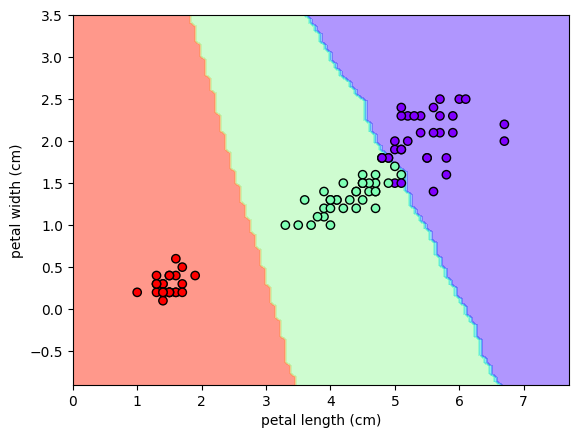

In [56]:
plot_decision_boundaries(knn)

## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

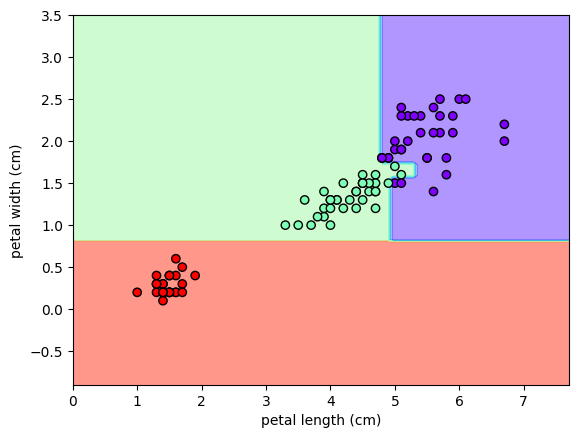

In [58]:
plot_decision_boundaries(dt)

In [59]:
dt.feature_importances_

array([0.4862921, 0.5137079])

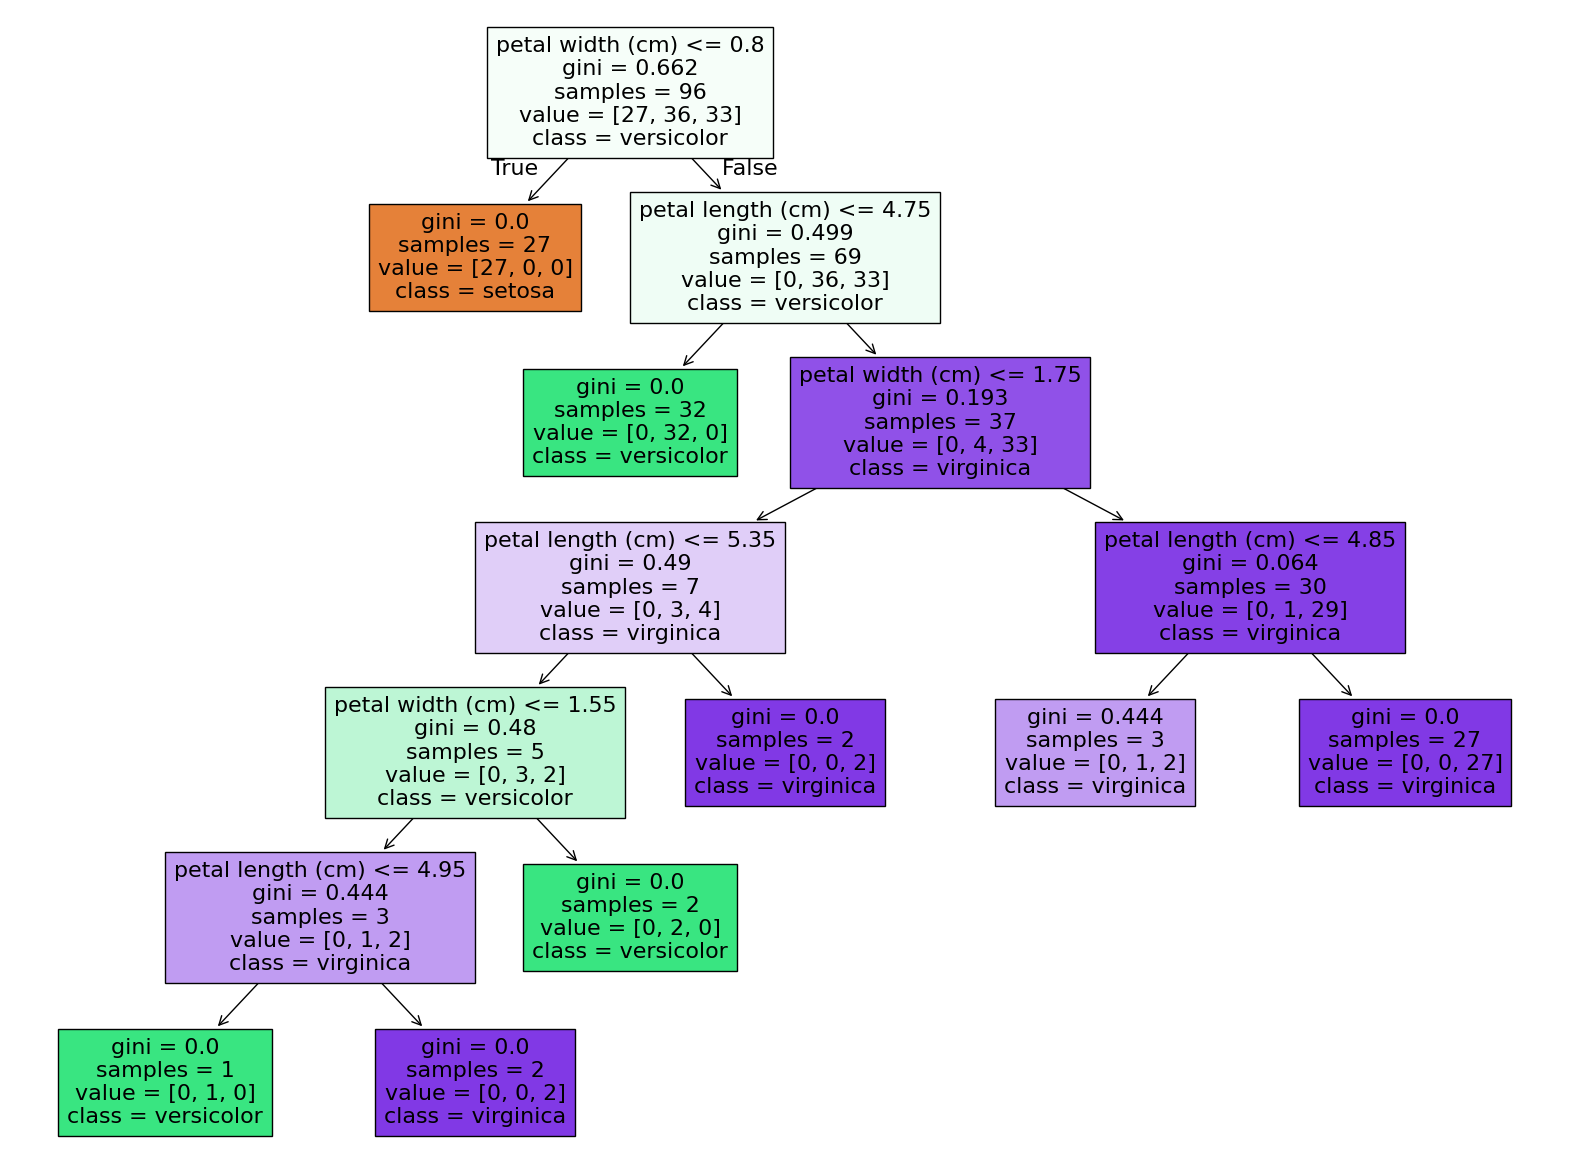

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=iris.target_names)
plt.show()

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

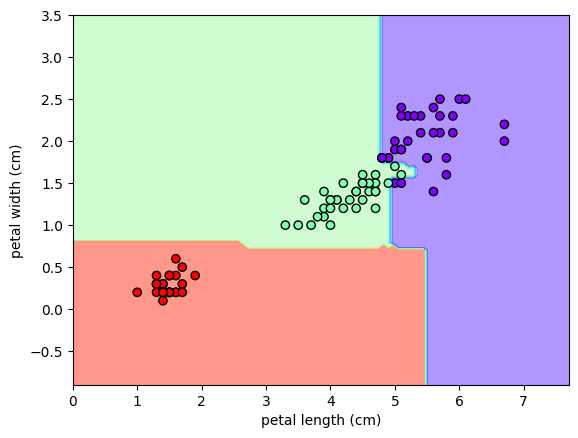

In [62]:
plot_decision_boundaries(rf)

In [63]:
rf.feature_importances_

array([0.52537288, 0.47462712])

# Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=0)

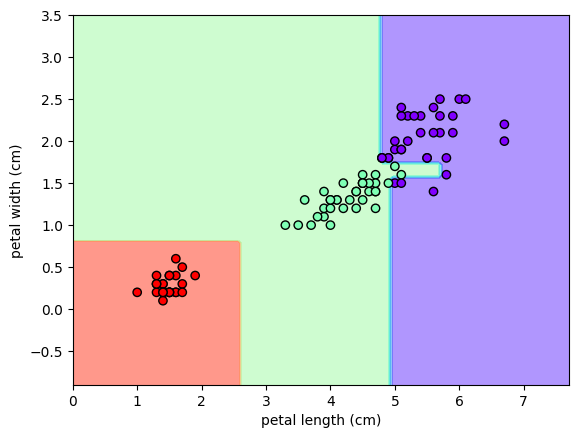

In [65]:
plot_decision_boundaries(gb)

In [66]:
gb.feature_importances_

array([0.71952987, 0.28047013])

In [27]:
# %pip install xgboost

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

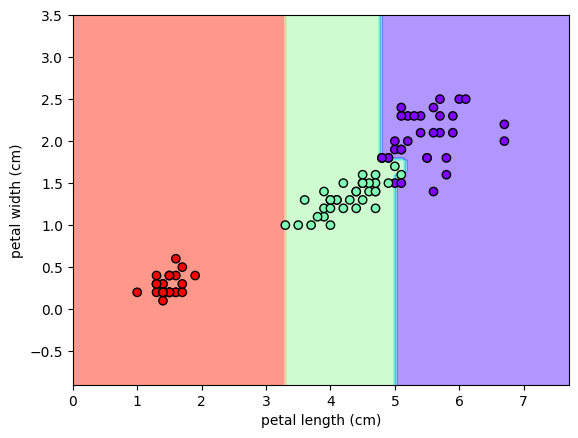

In [68]:
plot_decision_boundaries(xgb)

In [69]:
xgb.feature_importances_

array([0.9406545 , 0.05934543], dtype=float32)